In [230]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from cycler import cycler
from pathlib import Path

A = 5.5
path_dynamics = '../../files/dynamics/TirozziTsodyks/Fig2/'
path_mft = '../../files/MFT/TirozziTsodyks/'
path_save = 'panels/'
Path(path_save).mkdir(parents=True, exist_ok=True)


In [206]:
N = 1000000
K = 2 * np.log(N)

ov_real = []
del0_real = []
delt_real = []
ov_dyn_real = []
for p in range(1, 40):
    overlaps = []
    ov_dyn = []
    del0 = []
    delt = []
    for s in range(0,10):
        dyn_TT = pickle.load(open(path_dynamics+'retrieval_N_'+str(int(N/1000))+'K_seed_'+str(s)+'_p_'+str(p)+'_A_5.5.p','rb'))
        ov_dyn.append(dyn_TT['dynamics']['overlaps'][1999:-1][:,0])
        ov = np.mean(dyn_TT['dynamics']['overlaps'][1999:-1])
        d0 = np.mean(dyn_TT['dynamics']['del0s'][1999:-1])
        dt = dyn_TT['dynamics']['del_t']
        overlaps.append(ov)
        del0.append(d0) 
        delt.append(dt)
    overlaps = np.array(overlaps)
    del0 = np.array(del0)
    delt = np.array(delt)
    ov_dyn = np.array(ov_dyn)
    
    del0_real.append(del0)
    ov_real.append(overlaps)
    delt_real.append(delt)
    ov_dyn_real.append(ov_dyn)
ov_real = np.array(ov_real)
del0_real = np.array(del0_real)
delt_real = np.array(delt_real)
ov_dyn_real = np.array(ov_dyn_real)
delinf_real = delt_real[:,:,-1]
alpha = np.arange(1,40,1)/K
ov_real.shape
#plt.plot(dyn_TT['dynamics']['del_t'])
#plt.plot(dyn_TT['dynamics']['del0s'][1999:-1]) 


(39, 10)

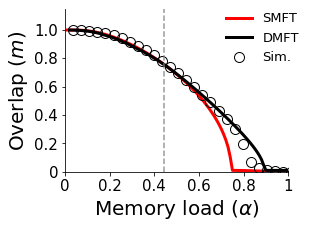

In [285]:



the_alpha_s,ov_s =  pickle.load(open(path_mft + 'overlap_smft_A_5.5.p','rb'), encoding = 'latin1')
the_alpha_d,ov_d =  pickle.load(open(path_mft + 'overlap_dmft_A_5.5.p','rb'), encoding = 'latin1')



n_pnts = 1200



cap = 0.6 * np.ones(3)




fs_leg = 13
fs_lab = 20
fs_ticks = 15

fig = plt.figure(figsize=(4,3 ))
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.25,hspace=0.05)
ax = plt.subplot(gs1[0,0])





lw =3
trans_chaos = 0.442673671053
ax.plot(the_alpha_s,ov_s[:,1],color='r',ls = '-',lw= lw,label = 'SMFT')
ax.plot(the_alpha_d,ov_d[:,2],color='k',lw = lw,label = 'DMFT')
ax.plot(alpha, np.mean(ov_real, axis = 1),'ok', markerfacecolor = 'None',ms = 10, label = 'Sim.')
#overlap.plot(the_alpha,np.mean(overlap_sim[0],axis=0),'og',markerfacecolor = 'None',ms = 10,label = r'$20K$')
#overlap.plot(the_alpha,np.mean(overlap_sim[1],axis=0),'sg',markerfacecolor = 'None',ms = 10,label = r'$200K$')
ax.set_ylim([0,1.15])
ax.set_yticks([0.5,1])
ax.axvline(x = trans_chaos,ymin = 0, ymax =2, ls = '--',color = 'gray',alpha = 0.8)
#overlap.set_xlabel(r'Memory load ($\alpha$)',fontsize = 15)
ax.set_ylabel(r'Overlap ($m$)',fontsize = fs_lab)
ax.set_xlabel(r'Memory load ($\alpha$)',fontsize = fs_lab)
leg = ax.legend(fontsize = fs_leg, bbox_to_anchor=(1.1, 1.05))
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
yovticks = [0,0.2,0.4,0.6,0.8,1.]
xticks = [0,0.2,0.4,0.6,0.8,1]
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels(yovticks,fontsize = fs_ticks)
ax.set_xticklabels(xticks,fontsize = fs_ticks)
#overlap.set_title(r'(A)',fontsize = 18)
#overlap.set_xticks([])
ax.set_xlim([0,1.])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('panels/overlap_vs_load.pdf', bbox_inches='tight', transparent = True)
#plt.close()





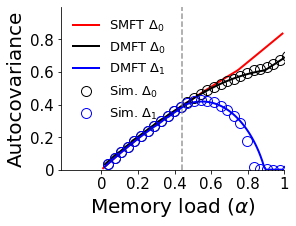

In [290]:
fig = plt.figure(figsize=(4,3 ))
gs1 = gridspec.GridSpec(1,1)
ax = plt.subplot(gs1[0,0])
ax.plot(the_alpha_s,ov_s[:,0] ,color='r',ls = '-',lw = lw,label = 'SMFT $\Delta_0$')
ax.plot(the_alpha_d,ov_d[:,0] ,color='k',lw =lw,label = r'DMFT $\Delta_0$')
ax.plot(the_alpha_d,ov_d[:,1] ,color='b',lw =lw,label = r'DMFT $\Delta_1$')
ax.plot(alpha,np.mean(del0_real, axis=1)/A**2 - np.mean(ov_real,axis=1)**2,'ok',markerfacecolor = 'None',ms = 10,label = r'Sim. $\Delta_0$')
ax.plot(alpha,np.mean(delinf_real, axis=1)/A**2 - np.mean(ov_real,axis=1)**2,'ob',markerfacecolor = 'None',ms = 10,label = r'Sim. $\Delta_1$')
ax.set_xlim([-.22,1.])
ax.set_ylim([0,1.])
ydel0ticks = [0,0.2,0.4,0.6,0.8]
xticks = [ 0,0.2,0.4,0.6,0.8,1]
ax.set_yticks([0,0.2,0.4,0.6,0.8])
ax.set_xticks(xticks)
ax.set_yticklabels(ydel0ticks,fontsize = fs_ticks)
ax.set_xticklabels(xticks,fontsize = fs_ticks)
ax.axvline(x = trans_chaos,ymin = 0, ymax =2, ls = '--',color = 'gray',alpha = 0.8)
ax.set_xlabel(r'Memory load ($\alpha$)',fontsize = fs_lab)
ax.set_ylabel(r'Autocovariance',fontsize = fs_lab)
leg = ax.legend(loc= 'upper left',fontsize = fs_leg)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
#del0.set_title(r'(B)',fontsize = 18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('panels/del0_vs_load.pdf', bbox_inches='tight',transparent = True)

#plt.close()


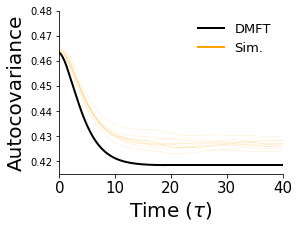

In [287]:
autocov_5_5 =  pickle.load(open(path_mft+'autocov_A_5.5_alpha_0.5428681023790648.p','rb'), encoding = 'latin1')
tau_5_5 = np.arange(len(autocov_5_5) * 5e-4,0,-5e-4)




PATH = '../files/dynamics/autocovariance/alpha_0_5_5/'

ind = 15
time = np.linspace(0, (delt_real.shape[2] * 0.5)/20, delt_real.shape[2])
delt_norm =  delt_real[ind-1]/A**2 - ov_dyn_real[ind-1]**2
delt_norm_mean =  np.mean(delt_real[ind-1],axis=0)/A**2 - np.mean(ov_dyn_real[ind-1],axis=0)**2

fs_leg = 13
fs_lab = 20
fs_ticks = 15
lw =2
fig = plt.figure(figsize=(4,3 ))
gs1 = gridspec.GridSpec(1,1)
auto = plt.subplot(gs1[0,0])

auto.plot(tau_5_5, autocov_5_5, color = 'k', lw = lw, label = 'DMFT')

auto.plot(time, -20 * delt_norm_mean,color='orange',ls = '-',lw = lw,label = r'Sim.')
auto.plot(time, delt_norm.transpose(),color='orange',alpha = 0.2, lw = 0.5)

#auto.plot(time, np.mean(the_del_t[1], axis =0),color='b',ls = '-',lw = lw,label = r'200K')
#auto.plot(time, np.transpose(the_del_t[1]),color='b',alpha = 0.05, lw = 0.5)

#auto.plot(time, np.mean(the_del_t[2], axis =0),color='purple',ls = '-',lw = lw,label = r'300K')
#auto.plot(time, np.transpose(the_del_t[2]),color='purple',alpha = 0.05, lw = 0.5)

#auto.plot(time, np.mean(the_del_t[3], axis =0),color='r',ls = '-',lw = lw,label = r'500K')
#auto.plot(time, np.transpose(the_del_t[3]),color='r',alpha = 0.05, lw = 0.5)
auto.set_xlim([0,40])
auto.axhline(y = min(autocov_5_5), xmin=np.max(tau_5_5)/40., xmax = 1000, ls = '-', color='k', lw = lw)
auto.set_ylim([0.415,.48])
yticks = [0.42,0.44,0.46,0.48]
xticks = [0,10,20,30,40]
#auto.set_yticks(yticks)
#auto.set_yticklabels(yticks,fontsize = fs_ticks)
auto.set_xticklabels(xticks,fontsize = fs_ticks)
#del0.axvline(x = trans_chaos,ymin = 0, ymax =2, ls = '--',color = 'gray',alpha = 0.8)
auto.set_ylabel(r'Autocovariance',fontsize = fs_lab)
auto.set_xlabel(r'Time ($\tau$)',fontsize = fs_lab)
leg = auto.legend(loc = 'upper right',fontsize = fs_leg)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
#del0.set_title(r'(B)',fontsize = 18)
auto.spines['right'].set_visible(False)
auto.spines['top'].set_visible(False)
plt.savefig('panels/autocovariance.pdf', bbox_inches='tight',transparent = True)

#mean_del_t = np.array([np.mean(the_del_t[l], axis = 0)[0] for l in range(len(the_del_t))])


In [223]:
17/K


0.6152505160296068

8

In [166]:
delt_norm.shape

(14002,)

In [168]:
time.shape

(10,)